# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch, 
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [1]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [3]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [5]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [6]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Criação do modelo da rede

In [34]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [35]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


tensor([[-0.0441,  0.0363]])

### Testando o predict da rede

In [36]:
model(Variable(torch.ones((5,2))))

tensor([[-0.0078],
        [-0.0078],
        [-0.0078],
        [-0.0078],
        [-0.0078]], grad_fn=<MmBackward0>)

## Treinamento

### Definindo função de perda e otimizador

In [37]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

### Laço de treinamento

In [38]:
num_epochs = 120
w0_list = []
w1_list = []
losses = []

for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = model(inputs)
    
    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    #loss cálculo da função de perda
    loss = criterion(out, target)

    #capturando as perdas em um vetor
    losses.append(loss.item())
    
    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # loss = torch.pow(out - target, 2).mean()
    # # backward propagation - cálculo gradiente
    # loss.backward()
    # # gradiente descendente
    # model.weight.data = model.weight.data - learning_rate * model.weight.grad.data
    # # zeragem parâmetros próximo cálculo do gradiente
    # model.weight.grad.data.zero_()
    
    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/120], loss: 0.024193
Epoch[40/120], loss: 0.022129
Epoch[60/120], loss: 0.021474
Epoch[80/120], loss: 0.021266
Epoch[100/120], loss: 0.021200
Epoch[120/120], loss: 0.021179


## Avaliação

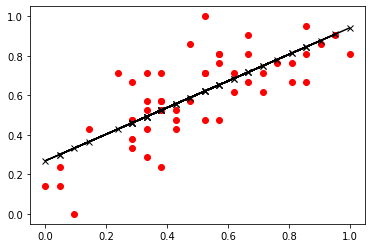

In [12]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

In [13]:
y_pred = model(Variable(x_train_bias))
loss = criterion(y_pred, Variable(y_train))
print(loss)

tensor(0.0212, grad_fn=<MseLossBackward0>)


# Exercícios

- 1) Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a
   função `criterion` utilizada no laço de treinamento.

- 2) Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para
   mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

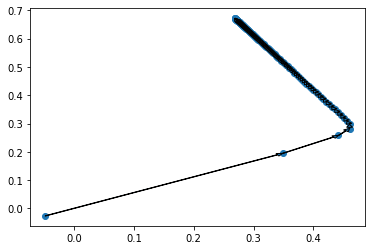

In [14]:
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

- 3) Crie um gráfico com a evolução da perda com o evoluir das épocas.

In [39]:
losses

[0.4383406937122345,
 0.054519280791282654,
 0.030707331374287605,
 0.028838716447353363,
 0.028329454362392426,
 0.027925023809075356,
 0.0275478083640337,
 0.027191922068595886,
 0.026855910196900368,
 0.02653864584863186,
 0.02623908594250679,
 0.025956232100725174,
 0.02568916231393814,
 0.025436995550990105,
 0.02519889362156391,
 0.02497408166527748,
 0.024761807173490524,
 0.024561379104852676,
 0.024372128769755363,
 0.02419344335794449,
 0.024024726822972298,
 0.02386542037129402,
 0.023715002462267876,
 0.023572979494929314,
 0.02343887835741043,
 0.02331225946545601,
 0.02319270372390747,
 0.023079819977283478,
 0.022973231971263885,
 0.022872595116496086,
 0.02277756854891777,
 0.022687846794724464,
 0.022603129968047142,
 0.022523140534758568,
 0.022447610273957253,
 0.022376298904418945,
 0.022308962419629097,
 0.022245388478040695,
 0.022185353562235832,
 0.022128673270344734,
 0.02207515761256218,
 0.022024620324373245,
 0.021976906806230545,
 0.021931855008006096,
 0.0

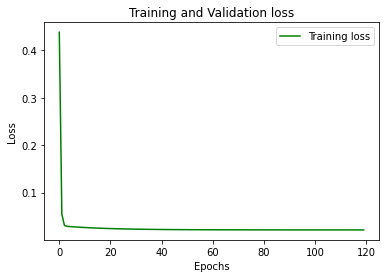

In [43]:
epochs = range(0,120)
plt.plot(epochs, losses, 'g', label='Training loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Aprendizados